Nome: Ramon Gomes Paulino       - RA: 250504

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

1) Considere a tabela:
    | X  |  Y |
    |:--:|:--:|
    | 2  |94.8|
    | 5  |98.7|
    | 8  |81.3|
    | 10 |74.9|
    | 14 |68.7|
    | 17 |64.0|
    | 27 |49.3|
    | 31 |44.0|
    | 35 |39.1|
    | 44 |31.6|

a) Ajuste as funções:<br>
    phi1(x) = a*e^(bx)<br>
    phi2(x) = x / (a+bx)<br>
aos dados tabelados usando o método dos quadrados mínimos.

b)Apresente no mesmo gráfico os pontos tabelados (diagrama de dispersão) e as funções ajustadas φ1 e
φ2.

c) Calcule a soma dos quadrados dos desvios em que a∗ e b∗ representam os parâmetros determinados pelo método dos quadrados mínimos.

![alt text](<eq. 2.png>)

d) Com base nos itens (b) e (c), qual das funções φ1 e φ3 melhor se ajusta aos pontos tabelados? Justifique sua resposta!


In [2]:
def minimos_quadrados_phi1(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)

    # Calculando os coeficientes b e A
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    A = (sum_y - b * sum_x) / n

    # Convertendo A de volta para a
    a = np.exp(A)

    return a, b

def minimos_quadrados_phi2(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)

    # Calculando os coeficientes a e b
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    a = (sum_y - b * sum_x) / n

    return a, b

##########################################################
A - Ajuste de Mínimos Quadrados para as Funções phi1(x) e phi2(x):

Coeficiente a_phi1: 102.51669347327382

Coeficiente b_phi1: -0.02721283231502323

Ajuste de mínimos quadrados na forma original: phi1(x) = 102.51669347327382 * e^(-0.02721283231502323 * x)

Coeficiente a_phi2: -0.165360958382799

Coeficiente b_phi2: 0.030914226011435376

Ajuste de mínimos quadrados na forma original: phi2(x) = x / (-0.165360958382799 + 0.030914226011435376 * x)

##########################################################
B - Comparação dos Ajustes de Mínimos Quadrados:



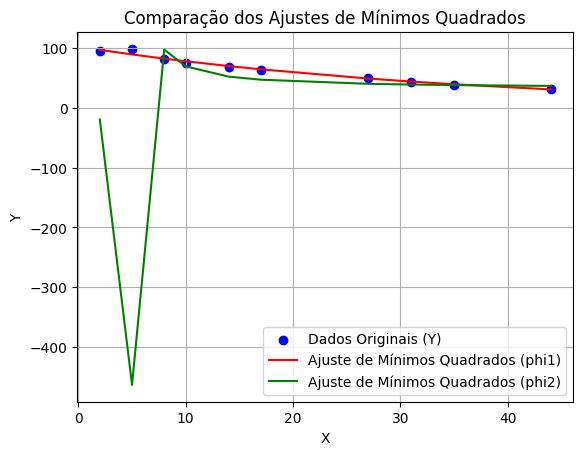

##########################################################
C - Soma dos Quadrados dos Erros (SSE):

SSE (phi1): 104.5976280166932
SSE (phi2): 329955.60268287925


In [3]:
print("##########################################################")
print("A - Ajuste de Mínimos Quadrados para as Funções phi1(x) e phi2(x):\n")

#A) Para encontrarmos o ajuste de mínimos quadrados da tabela fornecida, pelo polinômio phi1(x) = a*e^(bx), precisamos linearizar a equação.
# Tomando o logaritmo natural de ambos os lados, obtemos:
# ln(y) = ln(a) + bx
# Definindo Y' = ln(y) e A = ln(a), a equação se torna:
# Y' = A + bx
# Agora, podemos aplicar o método dos mínimos quadrados para encontrar os coeficientes A e b.
X = np.array([2, 5, 8, 10, 14, 17, 27, 31, 35, 44])
Y = np.array([94.8, 98.7, 81.3, 74.9, 68.7, 64.0, 49.3, 44.0, 39.1, 31.6])

a_phi1,b_phi1 = minimos_quadrados_phi1(X, np.log(Y))

print(f"Coeficiente a_phi1: {a_phi1}\n")
print(f"Coeficiente b_phi1: {b_phi1}\n")

#plotando os dados originais e o ajuste de mínimos quadrados para phi1(x) = a*e^(bx)
y_fit_phi1 = a_phi1 * np.exp(b_phi1 * X)

#levando de volta para a forma original, temos:
print(f"Ajuste de mínimos quadrados na forma original: phi1(x) = {a_phi1} * e^({b_phi1} * x)\n")

# Para ajustar a função agora a phi2(x) =  x / (a+bx), temos que rearranjar a equação para uma forma linear.
# Multiplicando ambos os lados por (a + bx), obtemos:
# y * (a + bx) = x
# Rearranjando, temos:
# y * a + y * b * x = x
# Agora, podemos definir Y'' = x / y, e a equação se torna:
# Y'' = a + b * x
# Agora, podemos aplicar o método dos mínimos quadrados para encontrar os coeficientes a e b.
a_phi2, b_phi2 = minimos_quadrados_phi2(X, X / Y)

y_fit_phi2 = X / (a_phi2 + b_phi2 * X)

print(f"Coeficiente a_phi2: {a_phi2}\n")
print(f"Coeficiente b_phi2: {b_phi2}\n")

print(f"Ajuste de mínimos quadrados na forma original: phi2(x) = x / ({a_phi2} + {b_phi2} * x)\n")

#B) Plotando os dados originais e o ajuste de mínimos quadrados para phi1(x) = a*e^(bx) e phi2(x) = x / (a + bx)
print("##########################################################")
print("B - Comparação dos Ajustes de Mínimos Quadrados:\n")
plt.scatter(X, Y, color='blue', label='Dados Originais (Y)')
plt.plot(X, y_fit_phi1, color='red', label='Ajuste de Mínimos Quadrados (phi1)')
plt.plot(X, y_fit_phi2, color='green', label='Ajuste de Mínimos Quadrados (phi2)')
plt.title('Comparação dos Ajustes de Mínimos Quadrados')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


#C) Calculando a soma dos quadrados dos erros (SSE) para cada ajuste
sse_phi1 = np.sum((Y - y_fit_phi1) ** 2)
sse_phi2 = np.sum((Y - y_fit_phi2) ** 2)
print("##########################################################")
print("C - Soma dos Quadrados dos Erros (SSE):\n")
print(f"SSE (phi1): {sse_phi1}")
print(f"SSE (phi2): {sse_phi2}")

##########################################################<br>
D : Quem melhor se ajusta aos pontos tabelados é a função phi1, pois contém a menor soma de erro quadrático dentre as duas funções sugeridas e também não tem uma descrepância grande quando o valor de b*x se aproxima de a, como na segunda função, que temos um pico, dado pela divisão ter um denominador muito próximo de 0, o que causa o erro quadrático acumulado grande

2) Considere os dados apresentados nas seguintes tabelas:
   
   ![alt text](tab_q2.png)

Calcule o valor aproximado de x tal que f(g(x)) = 0.6, usando polinômios interpolantes de grau 2.
Apresente os calculos ou os comandos utilizados para determinar a aproximação de x!

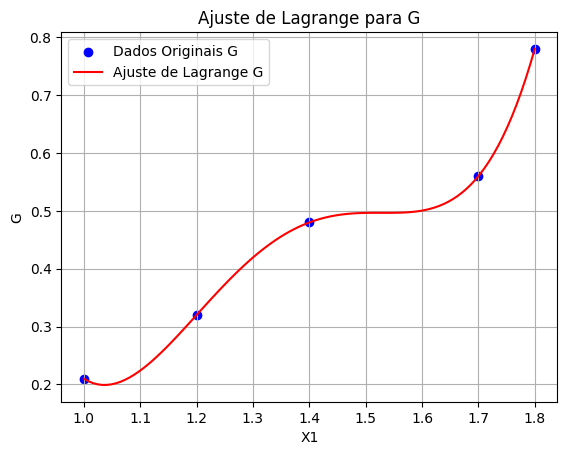

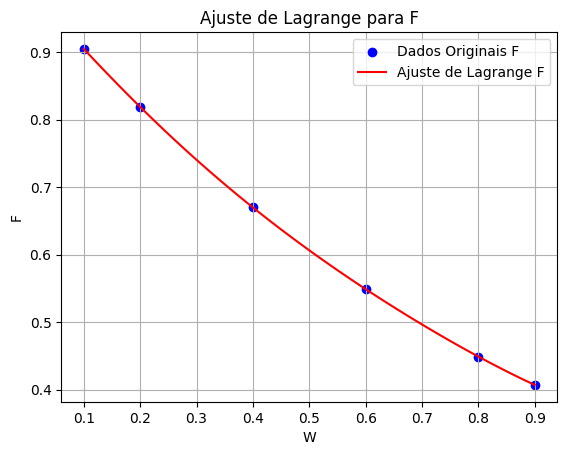

In [6]:
# Para determinar o melhor ajuste com grau 2, temos que escrever o sistema de equações normais para o polinômio de grau 2:
# phi3(x) = c0 + c1*x + c2*x^2

#Por lagrange:
X1 = np.array([1, 1.2, 1.4, 1.7, 1.8])
G = np.array([0.210, 0.320, 0.480, 0.560, 0.780])
V1 = np.array([[1, x, x**2, 0, 0] for x in X1])
Lx0 = lambda x: (x - X1[1]) * (x - X1[2]) * (x - X1[3]) * (x - X1[4]) / ((X1[0] - X1[1]) * (X1[0] - X1[2]) * (X1[0] - X1[3]) * (X1[0] - X1[4]))
Lx1 = lambda x: (x - X1[0]) * (x - X1[2]) * (x - X1[3]) * (x - X1[4]) / ((X1[1] - X1[0]) * (X1[1] - X1[2]) * (X1[1] - X1[3]) * (X1[1] - X1[4]))
Lx2 = lambda x: (x - X1[0]) * (x - X1[1]) * (x - X1[3]) * (x - X1[4]) / ((X1[2] - X1[0]) * (X1[2] - X1[1]) * (X1[2] - X1[3]) * (X1[2] - X1[4]))
Lx3 = lambda x: (x - X1[0]) * (x - X1[1]) * (x - X1[2]) * (x - X1[4]) / ((X1[3] - X1[0]) * (X1[3] - X1[1]) * (X1[3] - X1[2]) * (X1[3] - X1[4]))
Lx4 = lambda x: (x - X1[0]) * (x - X1[1]) * (x - X1[2]) * (x - X1[3]) / ((X1[4] - X1[0]) * (X1[4] - X1[1]) * (X1[4] - X1[2]) * (X1[4] - X1[3]))

pol1 = lambda x: G[0]*Lx0(x) + G[1]*Lx1(x) + G[2]*Lx2(x) + G[3]*Lx3(x) + G[4]*Lx4(x)

W = np.array([0.1, 0.2, 0.4, 0.6, 0.8, 0.9])
F = np.array([0.905, 0.819, 0.67, 0.549, 0.449, 0.407])
V2 = np.array([[1, w, w**2, 0, 0, 0] for w in W])
Lw0 = lambda w: (w - W[1]) * (w - W[2]) * (w - W[3]) * (w - W[4]) * (w - W[5]) / ((W[0] - W[1]) * (W[0] - W[2]) * (W[0] - W[3]) * (W[0] - W[4]) * (W[0] - W[5]))
Lw1 = lambda w: (w - W[0]) * (w - W[2]) * (w - W[3]) * (w - W[4]) * (w - W[5]) / ((W[1] - W[0]) * (W[1] - W[2]) * (W[1] - W[3]) * (W[1] - W[4]) * (W[1] - W[5]))
Lw2 = lambda w: (w - W[0]) * (w - W[1]) * (w - W[3]) * (w - W[4]) * (w - W[5]) / ((W[2] - W[0]) * (W[2] - W[1]) * (W[2] - W[3]) * (W[2] - W[4]) * (W[2] - W[5]))
Lw3 = lambda w: (w - W[0]) * (w - W[1]) * (w - W[2]) * (w - W[4]) * (w - W[5]) / ((W[3] - W[0]) * (W[3] - W[1]) * (W[3] - W[2]) * (W[3] - W[4]) * (W[3] - W[5]))
Lw4 = lambda w: (w - W[0]) * (w - W[1]) * (w - W[2]) * (w - W[3]) * (w - W[5]) / ((W[4] - W[0]) * (W[4] - W[1]) * (W[4] - W[2]) * (W[4] - W[3]) * (W[4] - W[5]))
Lw5 = lambda w: (w - W[0]) * (w - W[1]) * (w - W[2]) * (w - W[3]) * (w - W[4]) / ((W[5] - W[0]) * (W[5] - W[1]) * (W[5] - W[2]) * (W[5] - W[3]) * (W[5] - W[4]))
pol2 = lambda w: F[0]*Lw0(w) + F[1]*Lw1(w) + F[2]*Lw2(w) + F[3]*Lw3(w) + F[4]*Lw4(w) + F[5]*Lw5(w)

plt.scatter(X1, G, color='blue', label='Dados Originais G')
x0 = np.linspace(1, 1.8, 100)
plt.plot(x0, pol1(x0), color='red', label='Ajuste de Lagrange G')
plt.title('Ajuste de Lagrange para G')
plt.xlabel('X1')
plt.ylabel('G')
plt.legend()
plt.grid(True)
plt.show()
plt.scatter(W, F, color='blue', label='Dados Originais F')
x1 = np.linspace(0.1, 0.9, 100)
plt.plot(x1, pol2(x1), color='red', label='Ajuste de Lagrange F')
plt.title('Ajuste de Lagrange para F')
plt.xlabel('W')
plt.ylabel('F')
plt.legend()
plt.grid(True)
plt.show()

#